# Survival Analysis

This module has a single function, used to simulate data with a given
cumulative survival function.


In [33]:
import numpy as np
from lifelines import KaplanMeierFitter
from ISLP.survival import sim_time


## Define a cumulative hazard

For simplicity we'll use the the baseline $H(t)=t$ which defines the exponential distribution.

We'll take as our linear predictor $l=\log(2)$. This means we will observe draws from $H_l(t)=2t$ which
corresponds to an exponential distribution with mean 0.5.

In [34]:
cum_haz = lambda t: t
rng = np.random.default_rng(1)

In [35]:
T = np.array([sim_time(np.log(2), cum_haz, rng) for _ in range(500)])

## Plot survival function

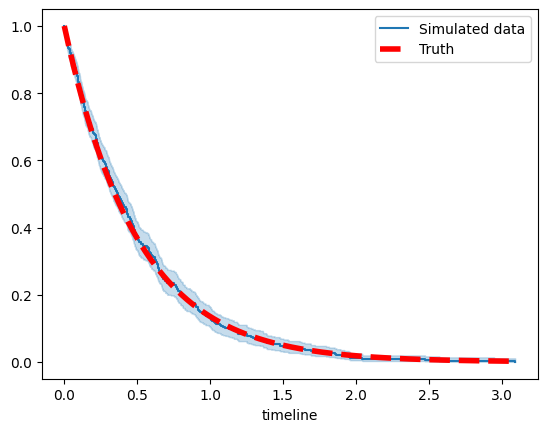

In [36]:
kmf = KaplanMeierFitter(label="Simulated data")
kmf.fit(T, np.ones_like(T))
ax = kmf.plot()
Tval = np.linspace(0, T.max(), 500)
ax.plot(Tval, 
        np.exp(-2*Tval),
        'r--',
        linewidth=4,
        label='Truth')
ax.legend();